# Machine Learning Master Notes 14 - Fitting Problem and Regularization 

### Prepare Environment

In [1]:
%matplotlib inline

# Essential libraries
import numpy as np
import pandas as pd

# Helper Function
import math
import random
import datetime
from datetime import datetime

# Graphical component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

# SciKit Learn Data Splitting and Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# SciKit Learn Pre-processing and Feature Scaling
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# SciKit Learn Regression Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV1 as my
import testFile as test


## Regression Model: Cost Function and Gradient Descent Summary 

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$


Cost Function:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(\vec{X}^{(i)})-\vec y^{(i)})^{2}$$ 
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \sum\limits_{j=0}^{n-1} \vec w_{j} \vec X_{j}^{(i)} \right)-\vec y^{(i)}\right)^{2}$$
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \vec X^{(i)} \cdot \vec w \right)-\vec y^{(i)}\right)^{2}$$
$$$$
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

## Problem with Overfitting and Underfitting

While implementing Regression models, we can see that sometimes, the prediction is not as accurate. Take linear regression for example, if the data looks more like a curve , linear regression will not be as accurate. We can add polynomial features to improve our model. However, if we apply polynomial features that are too complex, such as 40 degrees polynomial features; this may cause prediction to be very erratic. 

**The problem of using a straight line to predict a curve is known as underfitting problem. The problem of using too complex polynomial features for prediction is known as overfitting problem.**

This problem of overfitting and underfitting applies to not only regression models. It also happens in other machine learning models.

### Sample Data

In [2]:
# Preparing Random Sample Data
np.random.seed(3)
n_samples = 40
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.2

### Underfiting

In [3]:
# Linear regression
degree=1
x_train = X.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=degree,include_bias=False)
x_poly = polynomial_features.fit_transform(x_train)
lr_model = LinearRegression()
lr = lr_model.fit(x_poly,y)
y_pred_1 = lr.predict(x_poly)

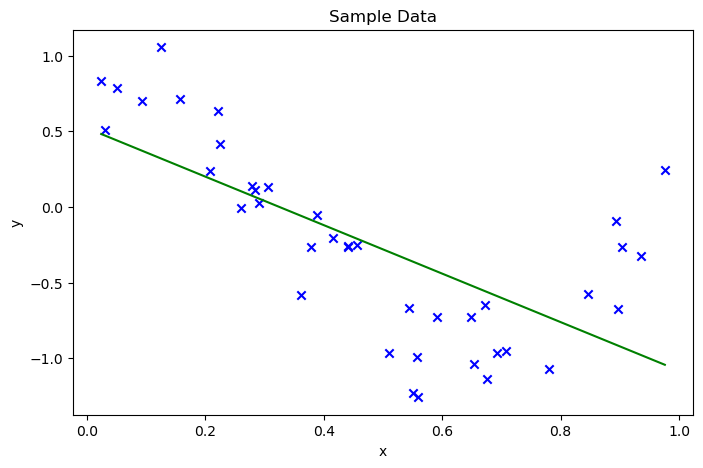

In [4]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X,y,c='b', marker='x')
ax1.plot(X, y_pred_1, c='g')
ax1.set_title('Sample Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

In [5]:
underfit_cost = my.cost_function(x_poly,y,lr.intercept_,lr.coef_)
underfit_cost

0.10738818029822389

Since the straight line could not fit our sample data well. We consider the prediction line **Under Fit**. This is also known as **High Bias** prediction. 

Based on the chart above, if we want to predict our y when our x is 0.6, then our prediction will be much higher than the actual data. Under fitting model produce **inaccurate prediction or bias prediction**.

### Overfiting

In [6]:
# Polynomial Regression
degree=40
x_train = X.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=degree,include_bias=False)
x_poly = polynomial_features.fit_transform(x_train)
lr = lr_model.fit(x_poly,y)
y_pred_40 = lr.predict(x_poly)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15',
       'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20', 'x0^21', 'x0^22',
       'x0^23', 'x0^24', 'x0^25', 'x0^26', 'x0^27', 'x0^28', 'x0^29',
       'x0^30', 'x0^31', 'x0^32', 'x0^33', 'x0^34', 'x0^35', 'x0^36',
       'x0^37', 'x0^38', 'x0^39', 'x0^40'], dtype=object)

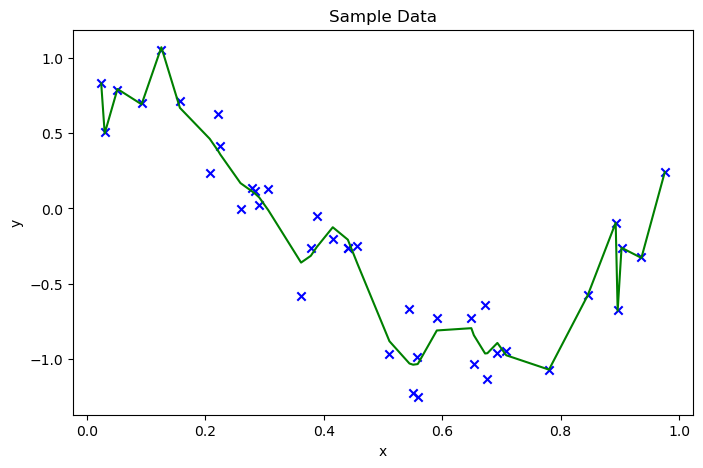

In [7]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
#ax1.plot(x, y_ideal, c='r')
ax1.scatter(X,y,c='b', marker='x')
ax1.plot(X, y_pred_40, c='g')
ax1.set_title('Sample Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

In the above example, we use 40 degrees of polynomial features. This model fits our sample data too well. We consider the prediction line **Over Fitting**. This is also known as **High Variance** prediction. 

Why over fitting is a problem? This is because if a prediction line is too precise, we may get inaccurate prediction for new data that is far away from the prediction. What we need is a trend so that new data can be fitted into the prediction.

While our algorithm's aim to reduce the cost function (i.e. errors of our prediction), please be aware that zero error may not be the desire outcome as it will not generalized well with new data query.

In [8]:
overfit_cost = my.cost_function(x_poly,y,lr.intercept_,lr.coef_)
overfit_cost

0.00882046858920707

We can demonstrate by predicting x from 0 to 1.

In [9]:
lnpredict = np.linspace(0,1,100).reshape(-1,1)
lnpredict_poly = polynomial_features.transform(lnpredict)
lnprediction = lr.predict(lnpredict_poly)

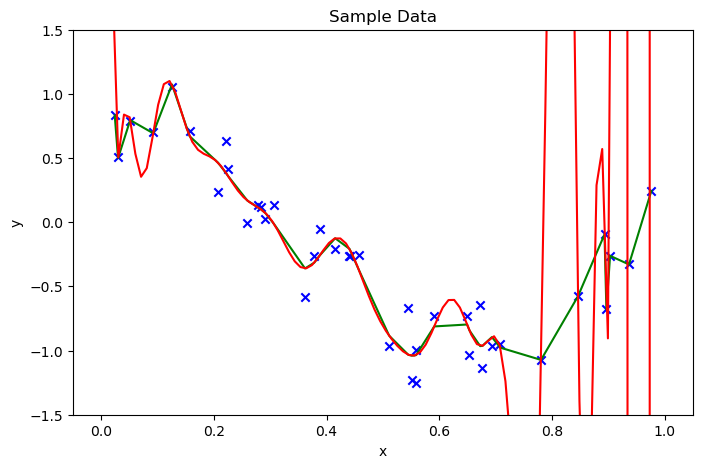

In [10]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
#ax1.plot(x, y_ideal, c='r')
ax1.scatter(X,y,c='b', marker='x')
ax1.plot(X, y_pred_40, c='g')
ax1.plot(lnpredict,lnprediction, c='r')
ax1.set_ylim(-1.5,1.5)
ax1.set_title('Sample Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

The data at the beginning and the end shows predictions that when off the charts.

If we limit prediction from 0.05 to 0.9. Please note the change in y limit.

In [11]:
lnpredict2 = np.linspace(0.05,0.9,100).reshape(-1,1)
lnpredict_poly2 = polynomial_features.transform(lnpredict2)
lnprediction2 = lr.predict(lnpredict_poly2)

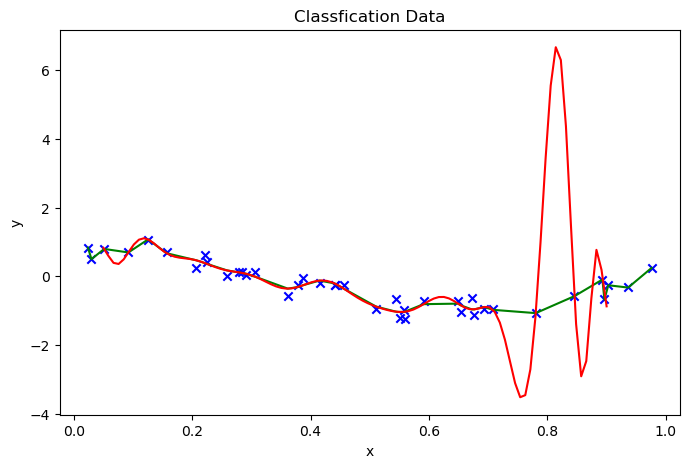

In [12]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
#ax1.plot(x, y_ideal, c='r')
ax1.scatter(X,y,c='b', marker='x')
ax1.plot(X, y_pred_40, c='g')
ax1.plot(lnpredict2,lnprediction2, c='r')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Just Right Fitting

In [13]:
# Polynomial Regression
degree=3
x_train = X.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=degree,include_bias=False)
x_poly = polynomial_features.fit_transform(x_train)
lr = lr_model.fit(x_poly,y)
y_pred_4 = lr.predict(x_poly)
polynomial_features.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3'], dtype=object)

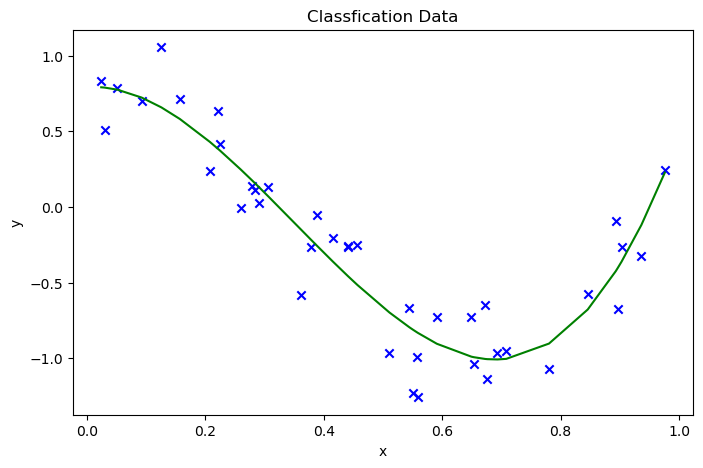

In [14]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
#ax1.plot(x, y_ideal, c='r')
ax1.scatter(X,y,c='b', marker='x')
ax1.plot(X, y_pred_4, c='g')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

In [15]:
justRight_cost = my.cost_function(x_poly,y,lr.intercept_,lr.coef_)
justRight_cost

0.02293008476857425

In [16]:
lnpredict3 = np.linspace(0,1,100).reshape(-1,1)
lnpredict_poly3 = polynomial_features.transform(lnpredict3)
lnprediction3 = lr.predict(lnpredict_poly3)

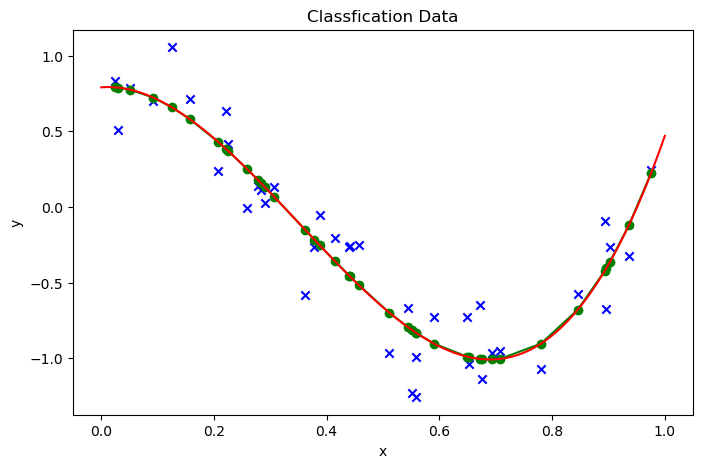

In [17]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
#ax1.plot(x, y_ideal, c='r')
ax1.scatter(X,y,c='b', marker='x')
ax1.plot(X, y_pred_4, c='g', marker='o')
ax1.plot(lnpredict3,lnprediction3, c='r')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

The above charts shows that with just right fitting, our prediction on the training data and our prediction from 0 to 1 overlaps each other. 

In the example above, the prediction move along where the data is but it will not try to fit every single data. We can say that this model generalized well.

In machine learning, we do not want under-fitting or over-fitting model. A prediction line that follows the trend but not too precise can generalized well so that it can be used to predict new query.

## Objective of Cost Function

Please note that when designing our learning models, although we want to reduce the errors by reducing cost function. Our ultimate goal is to able to make prediction with new data. That is, we want the model to generalized well such that it can be used to predict new data with less error.

Our goal when creating a model is to be able to use the model to predict outcomes correctly for new examples. A model which does this is said to generalize well. 

Comparing the cost using the example above:

In [18]:
underfit_cost

0.10738818029822389

In [19]:
overfit_cost

0.00882046858920707

In [20]:
justRight_cost

0.02293008476857425

Overfitting has the lowest cost and underfitting has the highest cost. **We would like to have something in the middle.**

## Summary of Fitting Problem

There are two types of fitting problem, they are:

- Underfitting
- Overfitting

### Underfitting Problem Summary

- Underfitting occurs when the coefficient is not able to make accurate prediction. This shows that the coefficient could not explain the relationship between the features and the result.
- Underfitting problem occurs when there are high training errors and high prediction errors.
- High training errors means that using existing data, the model could not make an accurate prediction after the model is trained.
- High prediction errors means that the model is also not able to make accurate prediction for the new query.
- Underfitting is also known as **High Bias**. 

### Overfitting Problem Summary

- Overfitting occurs when the coefficient is able to make accurate prediction on existing data but it is not able to make accurate prediction on new query. This shows that the coefficient can explain the relationship between the features and the result too well but not able to generalized well for new query.
- Overfitting problem occurs when there are very low training errors and high prediction errors.
- Very low training errors means that using existing data, the model could make accurate prediction too well.
- High prediction errors means that the model is also not able to make accurate prediction for the new query.
- Another characteristics of overfitting is that the prediction very significantly with small changes in data as shown in the example above.

## Addressing Overfitting Problem

The following are condition that may led to overfitting:

- **Too few data. If our data size is too small, it may led to overfitting.**
- **Too many features. If our features are too many and too complex, it may led to overfitting especially when our data size is not big enough.**
- **The model we use is too complex.**


To address overfitting the solution are as below:
    
- **Collect more data**
- **Another method is to use less features by reducing the number of features especially polynomial features. If our model still overfit, then we may consider reducing the number of features we have. We can choose only few of the most relevant features.**
- **The third method is to use <u>Regularization</u>. This is a technique that will reduce the weights of features/parameters so that it is too small (such as 0.00001) to be significantly meaningful while we can still keep these features.**



## Addressing Underfitting Problem

The following are condition that may led to underfitting:

- **Too few useful features. Either we do not have enough features to explain the relationship between the features and the outcome or our current features does not represent the outcome well.**
- **Too few data. Too few data may also lead to underfitting.**
- **The model we select is too simple or it does not have the capabilities to detect more complex relationship. For example, we use linear regression to predict a curvy relationship.**
- **Training iterations is not enough. If the training cost does not converge well, it may lead to inaccurate prediction.**
- **Over regularization. One of the technique to address overfitting is to use regularization. However, if we use such technique too aggressively, we may have the reverse effect.**


To address underfitting the solution are as below:

- **We need to redo feature selection and select the features that are most relevant to the outcome.**
- **We can also increase the complexity of the features by performing feature engineering and increase its polynomial complexity.** 
- **Collect more data**
- **Select model that are capable of detecting complex relationship.**
- **Increase the number of iterations and use learning curve to check for convergence.**
- **We might need to tune back regularization a bit if such technique has been applied too aggressively.**

## Regularization

To address overfitting, one of the way is to remove additional features. However, if we remove additional features entirely, we may lost important information from these features. An alternative to removing features is to reduce the impact/weights of the features mathematically to a very small numbers. This will have the advantage of retaining information from these features and at the same time reducing the impact such that overfitting is reduce. This technique is known as **regularization**.

This is a technique that will reduce the weights of features/parameters so that it is too small to be significantly meaningful while we can still keep these features. The intuition is as follows:

### Regularization Intuition

Suppose that we have a multiple features equation as follows:
$$$$
$$f_{\vec w,b}(x)=b + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + w_{4}x_{4}$$
$$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$
The cost function is as follows:
$$$$
$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(\vec{X}^{(i)})-\vec y^{(i)})^{2}$$ 
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \sum\limits_{j=0}^{n-1} \vec w_{j} \vec X_{j}^{(i)} \right)-\vec y^{(i)}\right)^{2}$$
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \vec X^{(i)} \cdot \vec w \right)-\vec y^{(i)}\right)^{2}$$

As we know that more features may cause problem of overfitting. We need to reduce the impact of $w_3$ and $w_4$ so that we can reduce overfitting. The simplest way is to drop the 2 features in the dataset.

Alternatively, we can mathematically reduce the impact of $w_3$ and $w_4$ to near zero.

Suppose we want to reduce the impact of $w_3$ and $w_4$ to a very small number (near zero). We can do so by adding a multiplication term to $w_3$ and $w_4$. As shown below:
$$$$
$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + 1000 \cdot w_{3} + 1000 \cdot w_{4}$$
$$$$
In order to reduce the cost, gradient descent need to reduce $w_3$ and $w_4$ to a very small, near zero, number. Hence, while performing gradient decent, the algorithm will effectively reduce and to a very small number that is almost zero. This will effectively remove the impact on and the weights.

We can further illustrate this problem by using a simple dataset as shown below

x|y
---|---
1|3
2|4
3|5

Based on the above data, we know that $w = 1$ and $b = 2$ or
$$f(x) = 2 + 1 \cdot x$$

In [21]:
x_train2 = np.array([1,2,3]).reshape(-1,1)
y_train2 = np.array([3,4,5]).reshape(-1,1)

In [22]:
best_w, best_b, _, _, _ = my.compute_gradient_descent(x_train2, y_train2)

iteration 9999: Last cost = 4.3845e-12: intercept = 2.0000e+00: weights = [[1.00000344]]
best w [[1.]]
best b 2.0


If we were to artificially increase $w$ to 1000 times, then the dataset should be

$$f_{\vec w,b}(x)=\left( b + 1000 \times w_{1}x_{1} \right)$$

x|y
---|---
1 x 1 x 1000|3
2 x 1 x 1000|4
3 x 1 x 1000|5


while y remains the same


In [23]:
x_train3 = x_train2 * 1000
x_train3

array([[1000],
       [2000],
       [3000]])

In [24]:
x_norm3, avg3, std3 = my.std_norm(x_train3)
best_w_norm3, best_b_norm3, _, _, _ = my.compute_gradient_descent(x_norm3, y_train2, iterations= 10000)

iteration 9999: Last cost = 2.5707e-28: intercept = 4.0000e+00: weights = [[0.81649658]]
best w [[0.8165]]
best b 4.0


In [25]:
best_w, best_b = my.reverse_bw_std_norm(best_w_norm3, best_b_norm3, avg3, std3)
print('best_w:', np.round(best_w, 4))
print('best_b:', np.round(best_b, 4))

best_w: [[0.001]]
best_b: 2.0


Based on the result above, the impact of $w$ has been reduced to $0.001$ where as $b$ remains the same as $2$. so,
$$f(x) = 2 + 0.001 x$$
$$f(x) = b = 2 $$

In a multiple features environment, however, we do not known if $x_3$ and $x_4$ is important features. Thus we have a problem that we do not know which feature is important and which feature can be penalized. The solution is to penalized all features. This will reduce the overfitting problem.

Usually we do not regularized the intercept but some machine learning program did include the regularization of the intercept.

Base on the reason above, we can modified the cost function by including the weights of all features in the regularization term:
$$$$
**Regularization Term:**
$$\frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
$$$$
Thus **Cost Function with Regularization** is:
$$$$
$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$

The first term of the cost function will fit the data and second term of the cost function will increase the cost and reduce the weights of all features. So these 2 terms will term will balanced out themselves to reduce overfitting problem.

We can adjust magnitude of regularization term by adjusting $\lambda$. 

### Adjusting Lambda

Adjusting Lambda has the same effect as adjusting the learning rate:

- If $\lambda = 0$ then the effect of regularization term is None. Thus the model will continue overfitting/underfitting as if no regularization has been applied.
- If $\lambda$ is very large such as $\lambda = 100000$ then weights of all features will reduce to near zero. Thus the model will be left with the intercept.
- What we aim for is a $\lambda$ value that is not too big and not too small, so that it will reduce overfitting will maintain weights for each feature.

### Simulation of Regularization Effect

Using the same data above:

In [26]:
x_train2

array([[1],
       [2],
       [3]])

In [27]:
y_train2

array([[3],
       [4],
       [5]])

Adding regularization term in the cost function has the same effect as adding the term to `x_train`

In [28]:
regLambda = 1000

In [29]:
reg_term = x_train2 * regLambda

In [30]:
x_train4 = x_train2 + reg_term
x_train4

array([[1001],
       [2002],
       [3003]])

In [31]:
x_norm4, avg4, std4 = my.std_norm(x_train4)
best_w_norm4, best_b_norm4, _, _, _ = my.compute_gradient_descent(x_norm4, y_train2, iterations= 10000)

iteration 9999: Last cost = 2.5707e-28: intercept = 4.0000e+00: weights = [[0.81649658]]
best w [[0.8165]]
best b 4.0


In [32]:
best_w, best_b = my.reverse_bw_std_norm(best_w_norm4, best_b_norm4, avg4, std4)
print('best_w:', np.round(best_w, 4))
print('best_b:', np.round(best_b, 4))

best_w: [[0.001]]
best_b: 2.0


The weights drops to 0.001, however, if we choose to use a smaller lambda, the results is shown below.

In [33]:
regLambda = 5

In [34]:
reg_term = x_train2 * regLambda

In [35]:
x_train5 = x_train2 + reg_term
x_train5

array([[ 6],
       [12],
       [18]])

In [36]:
x_norm5, avg5, std5 = my.std_norm(x_train5)
best_w_norm5, best_b_norm5, _, _, _ = my.compute_gradient_descent(x_norm5, y_train2, iterations= 10000)

iteration 9999: Last cost = 2.5707e-28: intercept = 4.0000e+00: weights = [[0.81649658]]
best w [[0.8165]]
best b 4.0


In [37]:
best_w, best_b = my.reverse_bw_std_norm(best_w_norm5, best_b_norm5, avg5, std5)
print('best_w:', np.round(best_w, 4))
print('best_b:', np.round(best_b, 4))

best_w: [[0.1667]]
best_b: 2.0


With a larger lambda the the coefficient will drop to 0.001. When the lambda is smaller such as 5, the coefficient will drop from 1 to 0.1. **Therefore, lambda controls how large the magnitude to reduce the weights for each features.**

## Cost Function with Regularization

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$

Parameters:	$$\vec w ,b$$

Cost Function:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(\vec{X}^{(i)})-\vec y^{(i)})^{2}$$ 
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \vec X^{(i)} \cdot \vec w \right)-\vec y^{(i)}\right)^{2}$$
$$$$
<font color='red'> 
**Cost Function with Regularization:**	
$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$ 
$$$$
<font color='red'> 
**Cost Function Regularization Term:**
$$\frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
</font>

Goal: minimize $J(w, b)$

## Implementing Gradient Descent with Regularization

Based on the cost function above, we can modified the gradient descent using the formula below:

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$

**Cost Function with Regularization:**	
$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$ 
$$$$

**Cost Function Regularization Term:**
$$\frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$
$$$$
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives with **NO** regularization: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Implementation of Gradient Descent with **NO** regularization:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$


<font color='blue'>
    
**Full Implementation of Gradient Descent with Regularization:**
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w}  -  \alpha \left( \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  + \frac{\lambda}{m} \vec{w} \right) \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

$$$$
<font color='blue'>
**Gradient Descent Regularization Term:** $$\frac {\lambda}{m} \vec{w}$$
</font>

## Mathematics Intuition of Gradient Descent with Regularization

### Mathematical Derivation

Cost Function with Regularization:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$ 

Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline
w_{j} &= w_{j} -  \alpha \frac{\partial J(w,b)}{\partial w_{j}}  \; \newline
\rbrace
\end{align*}$$


$$w_{j} = w_{j} -  \alpha \frac{\partial J(w,b)}{\partial w_{j}}$$
Cost Function with Regularization:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$ 
$$$$
$$\frac{\partial J(w,b)}{\partial w_{j}} = \frac{\partial }{\partial w_{j}}\left[\frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(x^{(i)})-y^{(i)})^{2} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}\right]$$
$$\frac{\partial J(w,b)}{\partial w_{j}} = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} ((b + X.w)-y).2x_{j} + \frac {\lambda}{2m} 2.w_{j}$$

<font color='blue'>
$$\frac{\partial J(w,b)}{\partial w_{j}} = \frac{1}{m}   \sum\limits_{i=0}^{m-1} ((b + X.w)-y)x_{j} + \frac {\lambda}{m} w_{j}$$
</font>

### Regularization Term and Its Effects

$$$$
$$w_{j} = w_{j} -  \alpha \left(\frac{1}{m}   \sum\limits_{i=0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b)-y^{(i)})\vec{X}^{(i)} + \frac {\lambda}{m} w_{j}\right)$$
$$w_{j} = w_{j} - \alpha \left(\frac {\lambda}{m} w_{j}\right) - \alpha \left(\frac{1}{m}   \sum\limits_{i=0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b)-y^{(i)})\vec{X}^{(i)}\right)$$
$$w_{j} = (w_{j} - \alpha \frac {\lambda}{m} w_{j}) - \alpha \left(\frac{1}{m}   \sum\limits_{i=0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b)-y^{(i)})\vec{X}^{(i)}\right)$$
$$w_{j} = w_{j}(1 - \alpha \frac {\lambda}{m}) - \alpha \left(\frac{1}{m}   \sum\limits_{i=0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b)-y^{(i)})\vec{X}^{(i)}\right)$$

The above re-arrangement of the formula is to show that the mathematical portion $1 - \alpha \frac {\lambda}{m}$ is added to the original gradient descent formula. This will reduce $w_{j}$ by a little bit at a time, thus reducing the effect of  $w_{j}$.

## Regression Function with Regularization

In [38]:
# Cost Function
def cost_function_regu_beta(X,y,coefficient,intercept,reguLambda=0):
    '''
    Actual cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    intercept (b) = scalar
    coefficient (w) = n by 1 vector, where n is total number of features
    reguLambda = default is 0, no regularization, please enter appropriate lambda value for regularization

    Return:
    Cost (scalar)
    '''

    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    m = X.shape[0]

    # Compute Normal Cost Function
    fx = (X@coefficient) + intercept
    lossFunction = (fx - y) ** 2
    RSS = lossFunction.sum()
    cost = (1 / (2 * m)) * RSS

    # Compute Regularization Term
    # lambda/2m * sum(w^2)
    regu = (reguLambda/ (2*m)) * sum(coefficient ** 2)

    totalCost = cost + regu[0]
    
    return totalCost

In [39]:
test.test_cost_function(cost_function_regu_beta)

Testing Cost Function <function cost_function_regu_beta at 0x120a7fce0>


Test Case 1: Testing....
Test Result: Test Case 1
X =  [1. 2. 3.]
y =  [1. 2. 3.]
w =  0
b =  0
Test Cost Function: 2.333333333333333
Expected Cost Function: [[2.33333333]]


Test Case 2: Testing....
Test Result: Test Case 2
X =  [1. 2.]
y =  [300. 500.]
w =  0
b =  0
Test Cost Function: 85000.0
Expected Cost Function: [[85000.]]


Test Case 3: Testing....
Test Result: Test Case 3
X =  [[1]
 [2]
 [3]]
y =  [[3]
 [4]
 [5]]
w =  0
b =  0
Test Cost Function: 8.333333333333332
Expected Cost Function: [8.33333333]


Test Case 4: Testing....
Test Result: Test Case 4
X =  [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y =  [[460]
 [232]
 [178]]
w =  [[0.]
 [0.]
 [0.]
 [0.]]
b =  0
Test Cost Function: 49518.0
Expected Cost Function: [49518.]


Test Case 5: Testing....
Test Result: Test Case 5
X =  [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y =  [460 232 178]
w =  [  0.391

In [40]:
# Compute Gradient
def compute_gradient_regu_beta(X,y, coefficient, intercept=0., reguLambda=0.):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    w = n by 1 vector, where n is total number of features
    b = scalar (default = 0)
    reguLambda = scalar (default = 0), no regularization if default. Please enter appropriate lambda value for regularization.

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    # total number of features and training examples
    m,n = X.shape

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Matrix computation
    fx = ((X@coefficient) + intercept)
    temp_dw = (fx - y) * X
    temp_db = (fx - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape([n,1]) 

    # Compute Regularization Term
    regu = coefficient * (reguLambda/m) 

    dwRegu = dw + regu

    return db, dwRegu

In [41]:
test.test_compute_gradient_function(compute_gradient_regu_beta)

Test Case 1: Testing....
Test Result: Test Case 1
Test Gradients: 0.6648774569425727 [[0.29653215]
 [0.49116796]
 [0.21645878]]
Expected Gradients: 0.6648774569425727 [0.29653215 0.49116796 0.21645878]
Test Case 2: Testing....
Test Result: Test Case 2
Test Gradients: -1.6739251122999121e-06 [[-2.72623577e-03]
 [-6.27197263e-06]
 [-2.21745571e-06]
 [-6.92403379e-05]]
Expected Gradients: -1.6739251122999121e-06 [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]
Test Completed.


**Expected Output**
```
Test Case 1:
dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]

Test Case 2:   
dj_db at initial w,b: -1.6739251122999121e-06  
dj_dw at initial w,b:   
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]  

In [42]:
def compute_gradient_descent_regu_beta(X, y, iterations=10000, init_b=0., init_w = None, alpha=0.01, reguLambda = 0., printProgress=False, 
                                       printProgressRate = 1000, storeHistory=False):
    '''
    Runs Gradient Descent

    Compulsory Input
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    
    Optional Input with Defauls
    iterations = total number of runs for the gradient descent (default: 10,000)
    init_b = initial b value (type: scalar) (default:0.)
    init_w = initial w value (type: n by 1 vector, where n is total number of features) (default:0.)
    alpha = learning rate / step size (default:0.01)

    Print Progress Options
    printProgress = To print the details while running gradient descent (type:Boolean) (default: False)
    printProgressRate = To print the details every n iterations (default:1000)

    Return:
    w = best w (n by 1 vector, where n is total number of features)
    b = best b (scalar)
    cost_history = Computed cost for each iterations (list)
    w_history = Computed w for each iterations (list)
    b_history = Computed g for each iterations (list)
    '''

    #### The following check for different data types and convert them to Numpy
    #### Also convert Pandas Series and DataFrame to Numpy
    #### Also convert 1D array to Numpy
    
    ### the following check if data type is Series
    if isinstance(X, pd.Series):
        #print('convert to numpy')
        X = X.to_frame()
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    ### the following check if data type is dataframe
    if isinstance(X, pd.DataFrame):
        #print('convert to numpy')
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(len(X),1)
    if y.ndim == 1:
        y = y.reshape(len(y),1)


    ### Check for init_w separately as the dimension of w depends on X
    ### Also perform copy to avoid changing the original array

    if np.any(init_w) == None:
        init_w = np.zeros([X.shape[1],1])

    if isinstance(init_w, pd.Series):
        init_w = init_w.copy().to_frame()

    if isinstance(init_w, pd.DataFrame):
        init_w = init_w.copy().to_numpy()

    if init_w.ndim == 1:
        init_w = init_w.copy()
        init_w = init_w.reshape(len(init_w),1)

    
    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if init_w.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w !')
        print(init_w.shape)
        print(X.shape[1])
        return

    # Initialization of variables
    m,n = X.shape
    
    db = 0
    dw = 0

    b = init_b
    w = init_w
    
    cost_history = []
    w_history = np.zeros((1,n))
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = compute_gradient_regu_beta(X,y,w,b,reguLambda)

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function_regu_beta(X,y,w,b,reguLambda)

        # Reshape w for printing and storing history
        w_convert = w.copy()
        w_convert = np.transpose(w_convert)
        
        if storeHistory == True: 
            cost_history.append(cost)
            b_history.append(b)
            w_history = np.vstack((w_history,w_convert))

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert.flatten()}")

    print(f"iteration {j}: Last cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert.flatten()}")
    print('best w', np.round(w.flatten(),4))
    print('best b', np.round(b,4)) 

    return w, b, cost_history, w_history[1:], b_history

### Additional Testing on Regression with Regularization

In [43]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7

In [44]:
dj_db_tmp, dj_dw_tmp =  compute_gradient_regu_beta(X_tmp, y_tmp, coefficient=w_tmp, intercept=b_tmp, reguLambda=lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425727
Regularized dj_dw:
 [[0.29653214748822276], [0.4911679625918033], [0.21645877535865857]]


**Expected Output**
```
dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]
 ```

In [45]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [46]:
best_w, best_b, _,_,_ = compute_gradient_descent_regu_beta(x,y)

iteration 9999: Last cost = 3.4860e-13: intercept = 2.2045e-06: weights = [0.99999903]
best w [1.]
best b 0.0


**Expected Result**: 

    w: 1
    b: 0

In [47]:
x2 = np.array([1.0, 2.0])   #features
y2 = np.array([300.0, 500.0])   #target value
best_w, best_b, _,_,_= compute_gradient_descent_regu_beta(x2,y2, iterations=20000)

iteration 19999: Last cost = 3.0931e-12: intercept = 1.0000e+02: weights = [199.99999516]
best w [200.]
best b 100.0


**Expected Result**: 

    w: 200
    b: 100

In [48]:
x3 = np.array([1,2,3])
y3 = np.array([3,4,5])
best_w, best_b, _,_,_ = compute_gradient_descent_regu_beta(x3,y3)

iteration 9999: Last cost = 4.3845e-12: intercept = 2.0000e+00: weights = [1.00000344]
best w [1.]
best b 2.0


**Expected Result**: 

    w: 1
    b: 2

In [49]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
cost_function_regu_beta(X_train, y_train,  w_init, b_init)

1.5578904330213735e-12

**Expected Result**: Cost at optimal w : 1.5578904045996674e-12

In [50]:
x_vec = X_train[0,:]
my.prediction(x_vec,b_init,w_init)

459.9999976194083

**Expected Result**: 460

In [51]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient_regu_beta(X_train, y_train, w_init, b_init)
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')
print(f'dj_db at initial w,b: \n {tmp_dj_db}')

dj_dw at initial w,b: 
 [[-2.72623577e-03]
 [-6.27197263e-06]
 [-2.21745571e-06]
 [-6.92403379e-05]]
dj_db at initial w,b: 
 -1.6739251122999121e-06


**Expected Result**:   
dj_db at initial w,b: -1.6739251122999121e-06  
dj_dw at initial w,b:   
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]  

In [52]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, _,_,_ = compute_gradient_descent_regu_beta(X_train, y_train, init_w=initial_w, init_b=initial_b, 
                                               iterations=iterations, alpha=alpha)
my.prediction(X_train,b_final, w_final)

iteration 999: Last cost = 6.8670e+02: intercept = -2.2354e-03: weights = [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
best w [ 0.204   0.0037 -0.0112 -0.0659]
best b -0.0022


array([[426.18530497],
       [286.16747201],
       [171.46763087]])

**Expected Result**:    
b,w found by gradient descent: -0.00,[ 0.2   0.0   -0.01 -0.07]   
prediction: 426.19, target value: 460  
prediction: 286.17, target value: 232  
prediction: 171.47, target value: 178  

## Application of Regularization on Housing Data

### Prepare Data

In [53]:
df = pd.read_csv('./data/housing_one_var.csv')
df.head()

,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [54]:
x1 = df['sqft'].to_frame()
x1.head()

,sqft
0,2104
1,1600
2,2400
3,1416
4,3000


In [55]:
y1 = df['price'].to_frame()
y1.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [56]:
df2 = pd.read_csv('./data/housing_two_var.txt')
y2 = df2['price'].to_frame()
X2 = df2[['sqft','rm']]
X2.head()

,sqft,rm
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [57]:
y2.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [58]:
df3 = pd.read_csv('./data/housing_four_var.txt')
y3_train = df3['price']
y3_train.head()

0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: price, dtype: float64

In [59]:
X3_train = df3[['sqft', 'rooms', 'floor', 'age']]
X3_train.head()

,sqft,rooms,floor,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


### Apply Housing Data with One Feature

In [60]:
x1.head()

,sqft
0,2104
1,1600
2,2400
3,1416
4,3000


#### Applying 12 Degree Polynomial with no Regularization

In [61]:
x1_poly = np.c_[x1, x1**2, x1**3, x1**4, x1**5, x1**6, x1**7, x1**8, x1**9, x1**10, x1**11, x1**12]

In [62]:
x_poly_norm1, avg1, stddev1 = my.std_norm(x1_poly)

In [63]:
# This is along process
# This is to demonstrate overfitting 
# Approx ~5 minutes

startTime = datetime.now()
print(startTime)

coef1, intercept1, _, _, _ = compute_gradient_descent_regu_beta(x_poly_norm1, y1, iterations=5000000, alpha=0.1, printProgress=True, 
                                                                printProgressRate=500000)

endTime = datetime.now()
print('Duration:', endTime - startTime)

2024-10-29 11:06:09.423308
iteration 0: cost = 5.0808e+10: intercept = 3.4041e+04: weights = [10576.41334928 10306.43370472  9703.92597013  9050.16979869
  8483.26579704 -3414.68335076   596.41884299 -2161.66380949
  -385.50342691 -3191.07408236 -2264.73175665   551.48233837]
iteration 500000: cost = 1.5904e+09: intercept = 3.4041e+05: weights = [ 243687.91945307 -470215.34695004  429944.97749913  173655.29565204
 -275293.62674734   -7164.39505875   -8161.16558739  -19398.58697887
   12653.32883155   -7110.60676958    -615.02543091  -15555.98998881]
iteration 1000000: cost = 1.5880e+09: intercept = 3.4041e+05: weights = [ 2.95317239e+05 -6.55296197e+05  6.76220028e+05  4.30077209e+04
 -2.57064049e+05 -7.11821609e+03 -8.16627985e+03 -1.94805819e+04
  1.27944690e+04 -7.20024131e+03 -4.86779639e+02 -1.56587306e+04]
iteration 1500000: cost = 1.5860e+09: intercept = 3.4041e+05: weights = [ 3.23824869e+05 -7.81000440e+05  8.98462387e+05 -1.37478767e+05
 -2.01519401e+05 -7.09697005e+03 -8.153

In [64]:
coef_or1, intercept_or1 = my.reverse_bw_std_norm(coef1, intercept1, avg1, stddev1)
print('original coef', coef_or1)
print('original intercept', intercept_or1)

original coef [[ 6.20750598e+02]
 [-3.84890780e-01]
 [ 1.32569747e-04]
 [-1.84041762e-08]
 [ 6.69185892e-13]
 [-1.36813827e-15]
 [-1.45000443e-15]
 [-3.65082462e-15]
 [ 2.32423143e-15]
 [-1.43536064e-15]
 [-4.49357339e-17]
 [-2.88809358e-15]]
original intercept -151673.32369657373


In [65]:
y_pred1 = my.prediction(x1_poly, intercept_or1, coef_or1)

In [66]:
pline = np.c_[x1,y_pred1]
pline = pline[pline[:,0].argsort()]

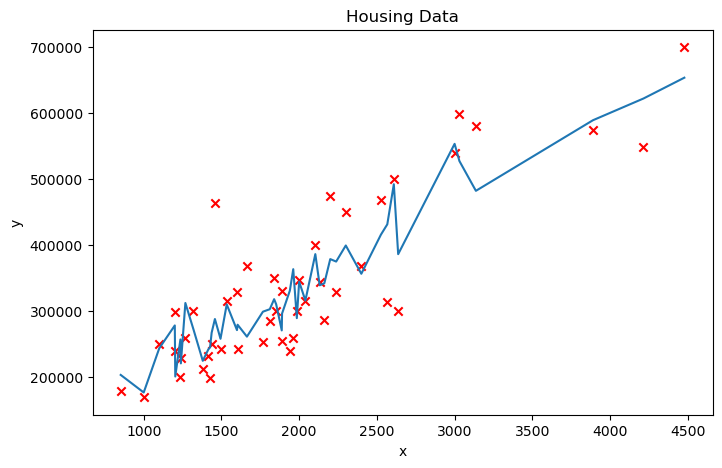

In [67]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x1, y1, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Housing Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

#### Applying 12 Degree Polynomial with Regularization (Lambda = 100)

In [68]:
coef1r, intercept1r, _, _, _ = compute_gradient_descent_regu_beta(x_poly_norm1, y1, iterations=200000, alpha=0.1, reguLambda = 100, 
                                                                  printProgress=True, printProgressRate=50000)

iteration 0: cost = 5.1339e+10: intercept = 3.4041e+04: weights = [10576.41334928 10306.43370472  9703.92597013  9050.16979869
  8483.26579704 -3414.68335076   596.41884299 -2161.66380949
  -385.50342691 -3191.07408236 -2264.73175665   551.48233837]
iteration 50000: cost = 4.0222e+09: intercept = 3.4041e+05: weights = [18258.97653241 15907.69598544 13299.84188602 11030.45994569
  9282.36938898 -7080.86595291  -174.18070485 -5484.87693559
   147.28366664 -5951.1800907  -3233.83330351 -1990.76193972]
iteration 100000: cost = 4.0222e+09: intercept = 3.4041e+05: weights = [18258.97653241 15907.69598544 13299.84188602 11030.45994569
  9282.36938898 -7080.86595291  -174.18070485 -5484.87693559
   147.28366664 -5951.1800907  -3233.83330351 -1990.76193972]
iteration 150000: cost = 4.0222e+09: intercept = 3.4041e+05: weights = [18258.97653241 15907.69598544 13299.84188602 11030.45994569
  9282.36938898 -7080.86595291  -174.18070485 -5484.87693559
   147.28366664 -5951.1800907  -3233.83330351 -1

In [69]:
coef_or1r, intercept_or1r = my.reverse_bw_std_norm(coef1r, intercept1r, avg1, stddev1)
print('original coef', coef_or1r)
print('original intercept', intercept_or1r)

original coef [[ 2.32242632e+01]
 [ 3.92400303e-03]
 [ 7.40415818e-07]
 [ 1.41794194e-10]
 [ 2.75719241e-14]
 [-1.38699905e-15]
 [-3.14074330e-17]
 [-1.04586149e-15]
 [ 2.65453046e-17]
 [-1.13648008e-15]
 [-5.95691828e-16]
 [-3.71972140e-16]]
original intercept 258736.26938212808


In [70]:
y_pred1r = my.prediction(x1_poly, intercept_or1r, coef_or1r)

In [71]:
pline = np.c_[x1,y_pred1r]
pline = pline[pline[:,0].argsort()]

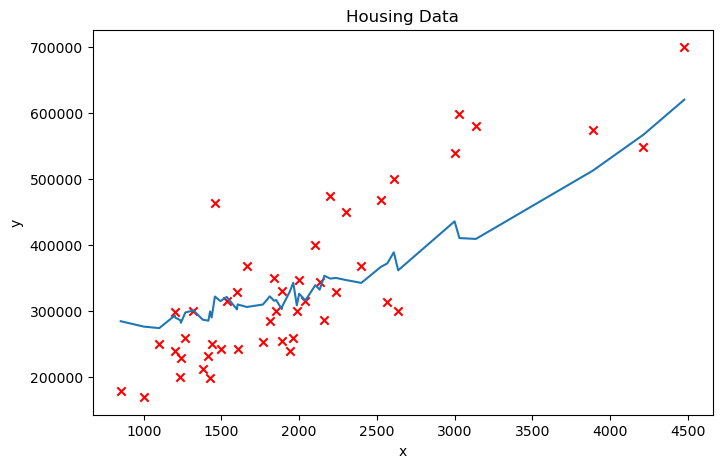

In [72]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x1, y1, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Housing Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

With lambda of 100, we can transform the prediction curve to a smoother one.

#### Applying 12 Degree Polynomial with Regularization (Lambda = 1000)

In [73]:
coef1ru, intercept1ru, _, _, _ = compute_gradient_descent_regu_beta(x_poly_norm1, y1, iterations=200000, alpha=0.01, reguLambda = 1000, 
                                                                    printProgress=True, printProgressRate=50000)

iteration 0: cost = 6.4005e+10: intercept = 3.4041e+03: weights = [1057.64133493 1030.64337047  970.39259701  905.01697987  848.3265797
 -341.46833508   59.6418843  -216.16638095  -38.55034269 -319.10740824
 -226.47317567   55.14823384]
iteration 50000: cost = 6.6968e+09: intercept = 3.4041e+05: weights = [ 4130.70545226  3969.64727892  3687.83519617  3398.601513
  3154.32840997 -1391.7377903    185.81317018  -906.50810804
  -125.00898201 -1279.13500719  -863.41092818   110.97522228]
iteration 100000: cost = 6.6968e+09: intercept = 3.4041e+05: weights = [ 4130.70545226  3969.64727892  3687.83519617  3398.601513
  3154.32840997 -1391.7377903    185.81317018  -906.50810804
  -125.00898201 -1279.13500719  -863.41092818   110.97522228]
iteration 150000: cost = 6.6968e+09: intercept = 3.4041e+05: weights = [ 4130.70545226  3969.64727892  3687.83519617  3398.601513
  3154.32840997 -1391.7377903    185.81317018  -906.50810804
  -125.00898201 -1279.13500719  -863.41092818   110.97522228]
itera

In [74]:
coef_or1ru, intercept_or1ru = my.reverse_bw_std_norm(coef1ru, intercept1ru, avg1, stddev1)
print('original coef', coef_or1ru)
print('original intercept', intercept_or1ru)

original coef [[ 5.25399605e+00]
 [ 9.79205787e-04]
 [ 2.05305562e-07]
 [ 4.36882928e-11]
 [ 9.36947238e-15]
 [-2.72613407e-16]
 [ 3.35049436e-17]
 [-1.72853818e-16]
 [-2.25306823e-17]
 [-2.44272805e-16]
 [-1.59045562e-16]
 [ 2.07356239e-17]]
original intercept 320230.5803704662


In [75]:
y_pred1ru = my.prediction(x1_poly, intercept_or1ru, coef_or1ru)

In [76]:
pline = np.c_[x1,y_pred1ru]
pline = pline[pline[:,0].argsort()]

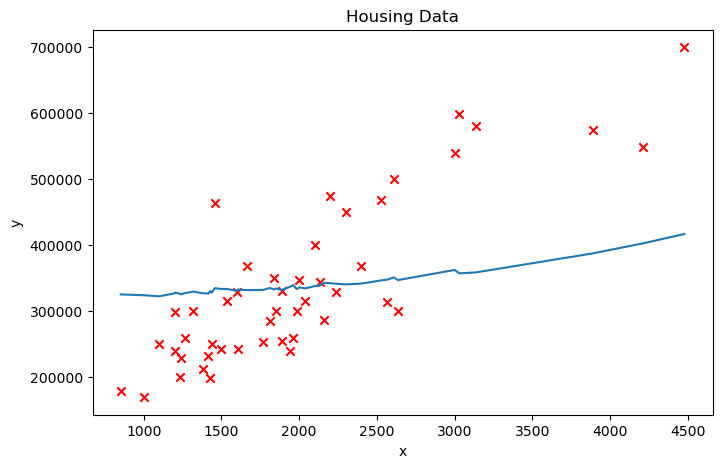

In [77]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x1, y1, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Our Polynomail Prediction'))
ax1.set_title('Housing Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

If the lambda is too large, such as 1000, as in this case, then the prediction line would be underfit and too general.

### Apply Housing Data with Two Features (12 Degrees Polynomial)

In [78]:
X2.head()

,sqft,rm
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


#### Gradient Descent with 12 Degrees Polynomial With No Regularization

In [79]:
degree = 12
polynomial_features= PolynomialFeatures(degree=degree,include_bias=False)
X2_poly = polynomial_features.fit_transform(X2)

In [80]:
std_scaler = StandardScaler()
X2_poly_norm = std_scaler.fit_transform(X2_poly)
reg = LinearRegression()
reg.fit(X2_poly_norm,y2)

LinearRegression()

In [81]:
y_pred_no_regu = reg.predict(X2_poly_norm)
pline = np.c_[X2['sqft'],y_pred_no_regu]
pline = pline[pline[:,0].argsort()]

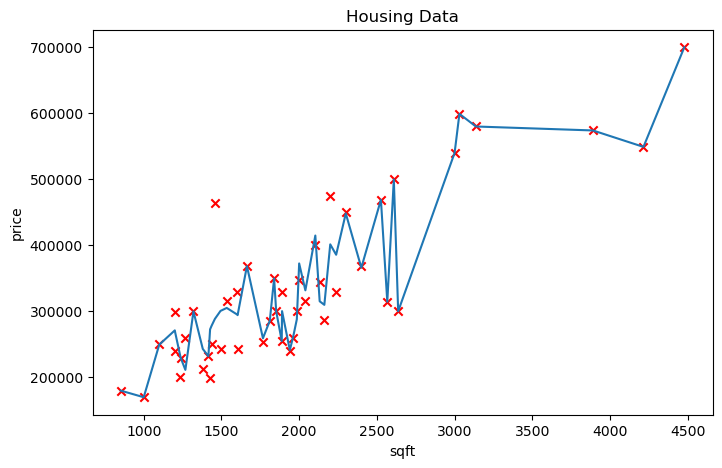

In [82]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2['sqft'], y2, marker='x', c='r')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.set_title('Housing Data')
ax1.set_xlabel('sqft')
ax1.set_ylabel('price')
plt.show()

In [83]:
myAsk = np.array([3800,3]).reshape(1,-1)
myAsk= pd.DataFrame(myAsk, columns=['sqft','rm'])

In [84]:
myAsk_poly = polynomial_features.transform(myAsk)

In [85]:
my.prediction(myAsk_poly, reg.intercept_, reg.coef_[0])

array([-2.06246486e+57])

In [86]:
linAsk = np.arange(1000, 4500, 100).reshape(-1,1)
rooms = np.ones((linAsk.shape[0],1)) * 3
linAsk = np.c_[linAsk, rooms]
linAsk[:5]

array([[1000.,    3.],
       [1100.,    3.],
       [1200.,    3.],
       [1300.,    3.],
       [1400.,    3.]])

In [87]:
linAsk= pd.DataFrame(linAsk, columns=['sqft','rm'])
linAsk_poly = polynomial_features.transform(linAsk)

In [88]:
linAsk_pred = my.prediction(std_scaler.transform(linAsk_poly), reg.intercept_, reg.coef_[0])
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

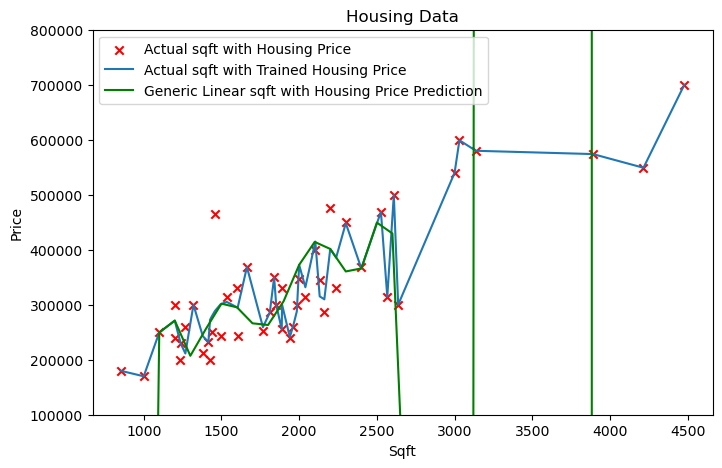

In [89]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2['sqft'], y2, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()


#### Gradient Descent with 12 Degrees Polynomial With Very High Regularization

In [90]:
X2_norm, avg2, stddev2 = my.std_norm(X2_poly)

In [91]:
coef, intercept, _, _, _ = compute_gradient_descent_regu_beta(X2_norm, y2, iterations=200000, alpha=0.001, reguLambda= 500, 
                                                              printProgress=True, printProgressRate=50000)

iteration 0: cost = 6.5037e+10: intercept = 3.4041e+02: weights = [105.76413349  54.70882176 103.06433705  97.7738803   56.87167954
  97.0392597   98.00031544  89.00009177  58.49254848  90.50169799
  92.08006239  90.62816597  82.31835023  59.82308305  84.83265797
  85.71477426  85.551292    83.60377849  77.19757059  60.83695463
  80.33409495  80.38550928  80.03249003  79.31925074  77.65413614
  73.10788193  61.4392177   76.86854418  76.25855479  75.49099104
  74.76711226  74.03059299  72.80769846  69.72363266  61.57924419
  74.19900224  73.12860952  72.02057717  71.07515736  70.34904438
  69.74548303  68.90597333  66.86748608  61.29194106  72.11000737
  70.74310627  69.41094134  68.27672431  67.40554581  66.78861041
  66.3313297   65.77259994  64.44426152  60.68091121  70.43554854
  68.89188829  67.43281782  66.18127036  65.18716039  64.45661907
  63.96138313  63.6235724   63.25605906  62.39573369  59.87508806
  69.05609227  67.41942778  65.90341413  64.59601109  63.5294514
  62.706943

In [92]:
coef_or2, intercept_or2 = my.reverse_bw_std_norm(coef, intercept, avg2, stddev2)
print('original coef', coef_or2.flatten())
print('original coef', intercept_or2)

original coef [ 5.81717715e+00  1.78027616e+03  9.62514959e-04  8.58206448e-01
  2.29241419e+02  1.74925959e-07  1.67997634e-04  1.25779840e-01
  3.57684442e+01  3.16479911e-11  3.02578315e-08  2.66019202e-05
  1.87751802e-02  5.84950527e+00  5.69360842e-15  5.26832665e-12
  4.74096702e-09  4.01123834e-06  2.81112969e-03  9.54811991e-01
  1.02571898e-18  9.07432953e-16  8.00922761e-13  7.01994343e-10
  5.87952992e-07  4.16949891e-04  1.51214528e-01  1.85776277e-22
  1.56376238e-19  1.32996828e-16  1.15175352e-13  1.00365997e-10
  8.43178057e-08  6.06791239e-05  2.27070673e-02  3.38618518e-26
  2.70793587e-23  2.19892616e-20  1.84117064e-17  1.59134331e-14
  1.39418462e-11  1.18093641e-08  8.58010745e-06  3.14379161e-03
  6.20649287e-30  4.71454163e-27  3.63247368e-24  2.89850892e-21
  2.42215145e-18  2.11047001e-15  1.87102355e-12  1.60018684e-09
  1.16148812e-06  3.79435131e-04  1.14186727e-33  8.23786307e-31
  5.98656562e-28  4.48864213e-25  3.54528385e-22  2.97838171e-19
  2.6357919

In [93]:
y_pred_regu500 = my.prediction(X2_poly, intercept_or2, coef_or2)
pline = np.c_[X2['sqft'],y_pred_regu500]
pline = pline[pline[:,0].argsort()]

In [94]:
linAsk_pred = my.prediction(linAsk_poly, intercept_or2, coef_or2)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

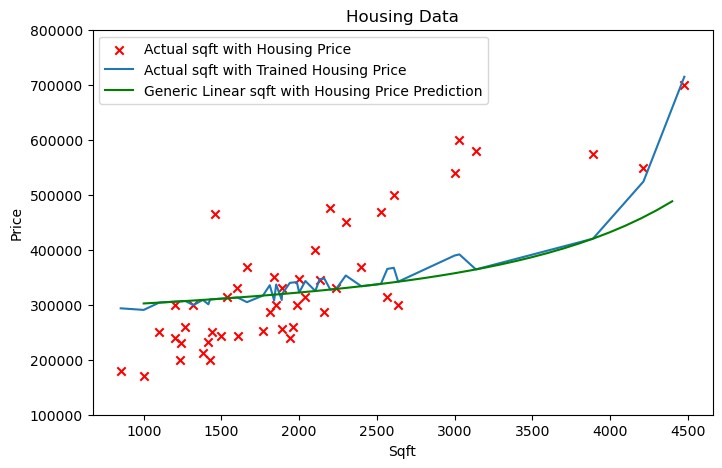

In [95]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2['sqft'], y2, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

In [96]:
my.prediction(myAsk_poly, intercept_or2, coef_or2)

array([[411251.7849447]])

**The prediction is lower than expected as the trend line is almost flat.**

#### Gradient Descent with 12 Degrees Polynomial With Some Regularization

In [97]:
coef, intercept, _, _, _ = compute_gradient_descent_regu_beta(X2_norm, y2, iterations=200000, alpha=0.001, reguLambda= 10, printProgress=True, 
                                                              printProgressRate=50000)

iteration 0: cost = 6.5035e+10: intercept = 3.4041e+02: weights = [105.76413349  54.70882176 103.06433705  97.7738803   56.87167954
  97.0392597   98.00031544  89.00009177  58.49254848  90.50169799
  92.08006239  90.62816597  82.31835023  59.82308305  84.83265797
  85.71477426  85.551292    83.60377849  77.19757059  60.83695463
  80.33409495  80.38550928  80.03249003  79.31925074  77.65413614
  73.10788193  61.4392177   76.86854418  76.25855479  75.49099104
  74.76711226  74.03059299  72.80769846  69.72363266  61.57924419
  74.19900224  73.12860952  72.02057717  71.07515736  70.34904438
  69.74548303  68.90597333  66.86748608  61.29194106  72.11000737
  70.74310627  69.41094134  68.27672431  67.40554581  66.78861041
  66.3313297   65.77259994  64.44426152  60.68091121  70.43554854
  68.89188829  67.43281782  66.18127036  65.18716039  64.45661907
  63.96138313  63.6235724   63.25605906  62.39573369  59.87508806
  69.05609227  67.41942778  65.90341413  64.59601109  63.5294514
  62.706943

In [98]:
coef_or3, intercept_or3 = my.reverse_bw_std_norm(coef, intercept, avg2, stddev2)
print('original coef', coef_or3.flatten())
print('original coef', intercept_or3)

original coef [ 3.97325054e+01  4.13525270e+03  5.59570502e-03  4.63698667e+00
 -7.05890259e+02  8.06920714e-07  8.33515104e-04  4.87154859e-01
 -2.80268395e+02  9.87562983e-11  1.20104061e-07  1.12374496e-04
  4.80521951e-02 -6.97376432e+01  7.33686173e-15  1.30535465e-11
  1.66637953e-08  1.50369935e-05  4.50004598e-03 -1.47345473e+01
 -9.02625378e-19  4.35215130e-16  1.65577090e-12  2.37498668e-09
  2.15302377e-06  4.63387147e-04 -2.79943471e+00 -6.22812732e-22
 -3.15172865e-19 -9.98650805e-18  2.37040205e-13  3.76024252e-10
  3.48187743e-07  7.54445281e-05 -4.85388800e-01 -2.06098513e-25
 -1.35033571e-22 -6.42718103e-20 -2.83375620e-18  4.31277770e-14
  6.79743477e-11  6.40028236e-08  1.94026168e-05 -7.66939192e-02
 -5.61506459e-29 -3.96927981e-26 -2.36968227e-23 -9.68769220e-21
  1.53969668e-18  9.49538447e-15  1.36121376e-11  1.28759726e-08
  5.47910188e-06 -1.08311576e-02 -1.39536448e-32 -1.01551153e-29
 -6.58018940e-27 -3.48547790e-24 -9.69787247e-22  9.42821393e-19
  2.2405749

In [99]:
y_pred_regu10 = my.prediction(X2_poly, intercept_or3, coef_or3)
pline = np.c_[X2['sqft'],y_pred_regu10]
pline = pline[pline[:,0].argsort()]

In [100]:
linAsk_pred = my.prediction(linAsk_poly, intercept_or3, coef_or3)
newpline = np.c_ [linAsk['sqft'],linAsk_pred]
newpline = newpline[newpline[:,0].argsort()]

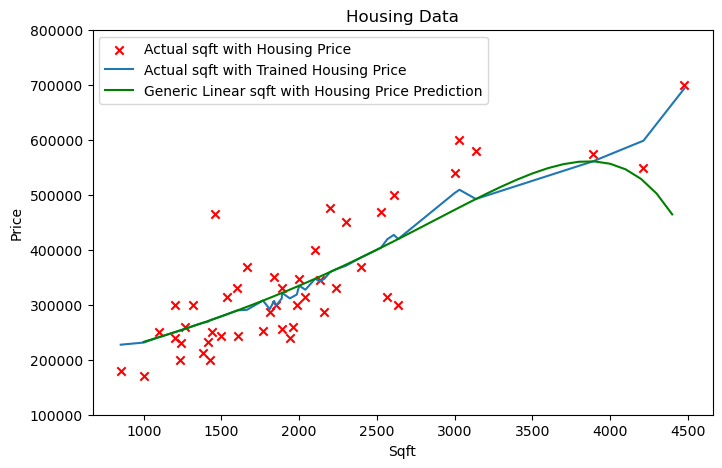

In [101]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2['sqft'], y2, marker='x', c='r', label='Actual sqft with Housing Price')
ax1.plot(pline[:,0], pline[:,1], label=str('Actual sqft with Trained Housing Price'))
ax1.plot(newpline[:,0], newpline[:,1], c='g', label='Generic Linear sqft with Housing Price Prediction')
ax1.set_ylim(100000,800000)
ax1.set_title('Housing Data')
ax1.set_xlabel('Sqft')
ax1.set_ylabel('Price')
ax1.legend(loc="upper left")
plt.show()

In [102]:
my.prediction(myAsk_poly, intercept_or3, coef_or3)

array([[559963.01276876]])

## End